## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings

## Read .csv - Exploratory data analysis

In [92]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [93]:
# No null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [94]:
# We can also verify this way.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [95]:
# General statistics -- Transpose for better view
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [96]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [97]:
# Imbalanced class issue
print('Target abs values\n', df['Class'].value_counts())
print('Target relative freq\n', df['Class'].value_counts()/len(df))

Target abs values
 0    284315
1       492
Name: Class, dtype: int64
Target relative freq
 0    0.998273
1    0.001727
Name: Class, dtype: float64


In [98]:
print('No fraud cases (abs): ', df['Class'].value_counts()[0]) 
print('Fraud cases (abs): ', df['Class'].value_counts()[1], '\n')
      
print('No fraud cases (rel freq): ', round(df['Class'].value_counts()[0]/len(df) * 100,2),'%') 
print('Fraud cases (rel freq): ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')

No fraud cases (abs):  284315
Fraud cases (abs):  492 

No fraud cases (rel freq):  99.83 %
Fraud cases (rel freq):  0.17 %


Text(0.5, 0, 'Is it fraud ?')

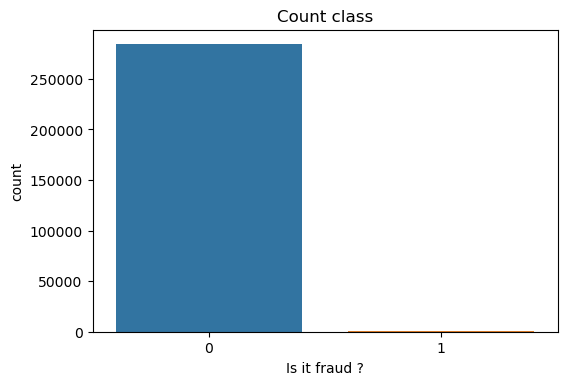

In [99]:
plt.figure(figsize=(6,4), dpi=100)
sns.countplot(x='Class', data= df)
plt.title('Count class')
plt.xlabel('Is it fraud ?')

#### Comment: 
You can tell how imbalanced the dataset is. Most of the transactions are not fraud cases, therefore considering a metric such as accuracy wouldn't be the most reasonable approach. I will keep this in mind when developing the ML models and will be mentioning different approaches all through this document. 

In [100]:
amount_val = df['Amount'].values
time_val = df['Time'].values

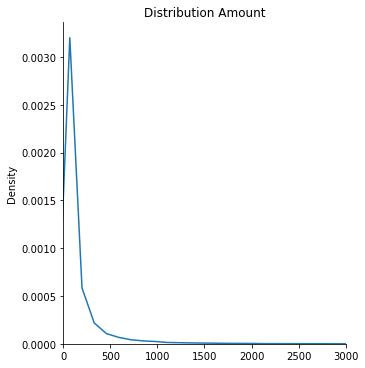

In [101]:
sns.displot(x=amount_val, kind='kde')
plt.title('Distribution Amount')
plt.xlim(0,3000)
plt.show()

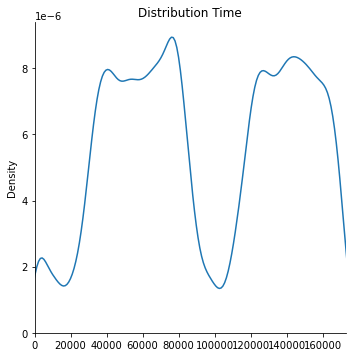

In [102]:
sns.displot(x=time_val, kind='kde')
plt.title('Distribution Time')
plt.xlim([min(time_val), max(time_val)])
plt.show()

## Scaling features
In this step, I will first scale the columns comprise of Time and Amount. Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time).

In [103]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [104]:
scaler = StandardScaler()
r_scaler = RobustScaler()

In [105]:
df['scaled_amount'] = r_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = r_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [106]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


## Train-Test split & Undersampling technique
It is important to keep in mind that we need to create a subsample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases (remember we are dealing with a highly imbalanced dataset). This will help our algorithms to better understand patterns that determines whether a transaction is a fraud or not.

If we decide to implement a ML model based on the original dataframe, this will cause the following issues:

* Overfitting: The model will assume that in most cases there are no frauds, thus the accuracy will be high, but other metrics (such as precision and recall) will be underperforming. 
* Wrong Correlations: It will help us to understand how each feature influences the result. However, having an imbalance dataframe, we are not able to see the true correlations between the class and features.


Therefore, before implementing a Random UnderSampling technique, it is necessary to split the train-test data: although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, the main goal is to test our models on the original testing set not on the testing set created by either of these techniques. 

In [110]:
X = df.drop('Class', axis=1)
y = df['Class']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [120]:
# We make sure we have quite a similar share (%) level 

print('Share Fraud over all transactions (%) - Train: ', round(y_train.value_counts()[1]/len(y_train)*100,3), '%')
print('Share Fraud over all transactions (%) - Test: ', round(y_test.value_counts()[1]/len(y_test)*100,3), '%')

Share Fraud over all transactions (%) - Train:  0.175 %
Share Fraud over all transactions (%) - Test:  0.163 %


### Comment
Keeping in mind that the Random Under Sampling technique face certain issues: the biggest one is that ML models will not perform as accurate as we would like to since there is a great deal of information we are losing (bringing 492 non-fraud transaction from 284,315 non-fraud transaction

In [121]:
## Shuffle the dataset before creating subsamples

df = df.sample(frac=1)

In [125]:
# Checking we have 492 values for fraud transactions.
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [128]:
fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class'] == 0][:492]  # Keeping the same amount of fraud transactions: 492

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=22)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
209452,-0.220933,1.131924,-0.785440,-0.214982,0.324733,-1.072854,0.616117,0.310217,-0.411061,-1.012896,...,1.273265,-0.037681,-0.075257,-0.932155,-0.244331,0.143942,0.215158,0,0.021938,0.621166
212516,-1.298443,1.948100,-4.509947,1.305805,-0.019486,-0.509238,-2.643398,1.283545,-2.515356,-4.501315,...,1.360989,-0.272013,-0.325948,0.290703,0.841295,0.643094,0.201156,1,-0.307273,0.636779
232447,1.870986,-0.152496,-1.750063,0.306646,0.270774,-0.564216,0.065430,-0.081358,0.702079,-0.710266,...,-0.387030,0.158457,0.658366,-0.092404,-0.151813,-0.024752,-0.013001,0,0.661217,0.734031
63634,-9.169790,7.092197,-12.354037,4.243069,-7.176438,-3.386618,-8.058012,6.442909,-2.412987,-6.134907,...,-0.817706,-0.150434,-0.039383,0.485640,-0.264325,1.159690,0.232758,1,1.089779,-0.398078
215804,2.050641,-0.252833,-1.973876,-0.175359,0.512704,-0.659750,0.308352,-0.223328,0.712599,-0.045952,...,-0.640616,0.171790,-0.017261,-0.039738,-0.144231,-0.074951,-0.055367,0,0.391253,0.652451


In [129]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Text(0.5, 0, 'is it Fraud ?')

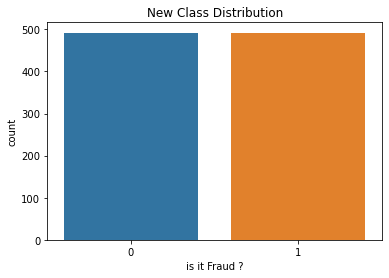

In [132]:
sns.countplot(x='Class', data=new_df)
plt.title('New Class Distribution')
plt.xlabel('is it Fraud ?')

## Correlation analysis
I would like to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important to use the correct dataframe (subsample).


<AxesSubplot:>

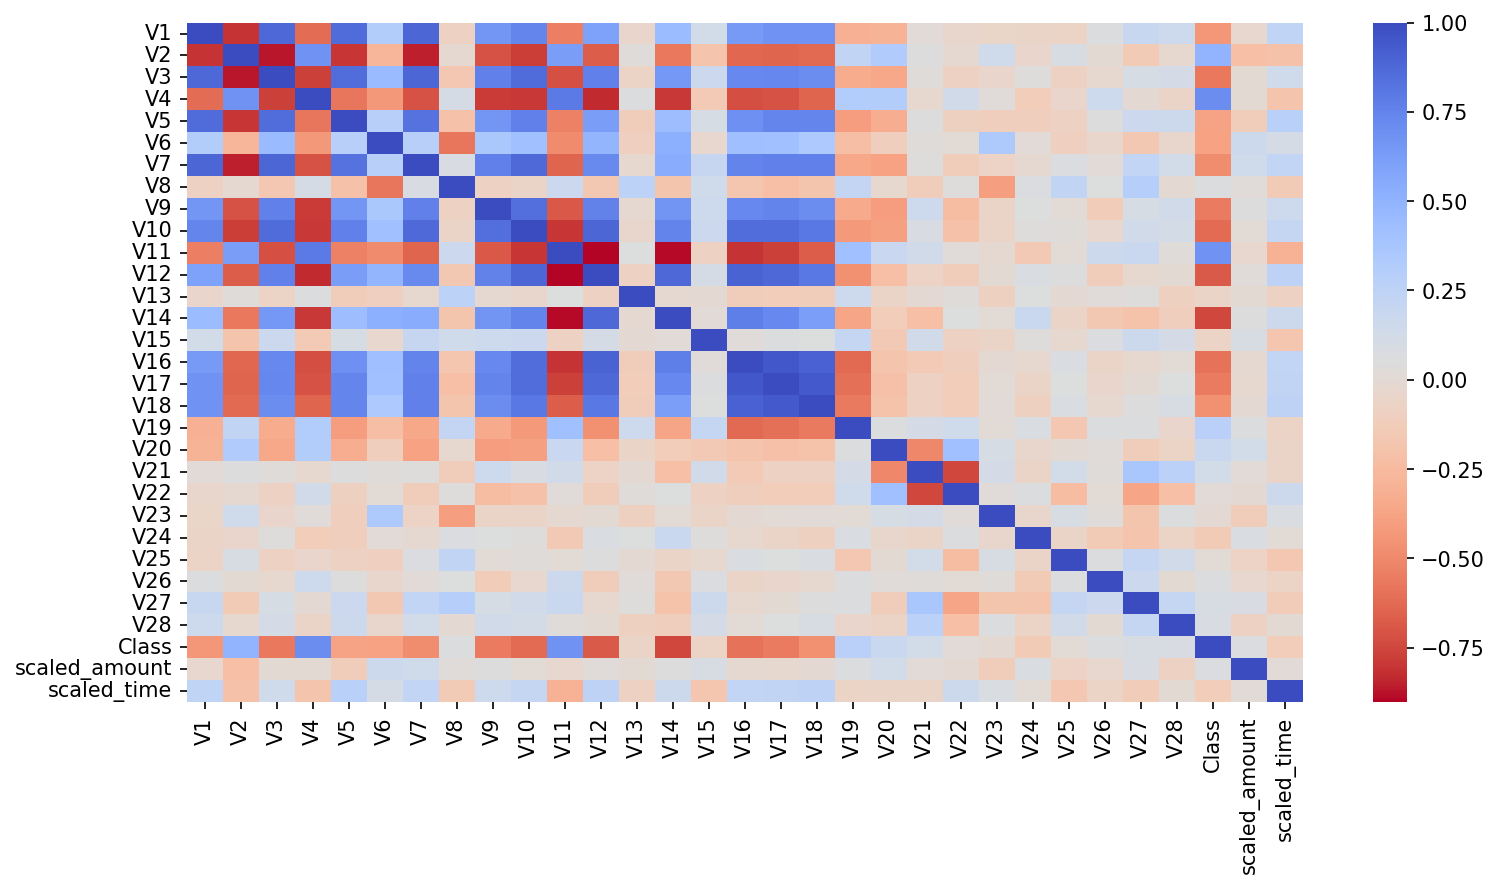

In [141]:
plt.figure(figsize=(12,6), dpi=150)
sns.heatmap(data=new_df.corr(), cmap='coolwarm_r')

* Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction (red color scale).
* Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction (blue color scale)

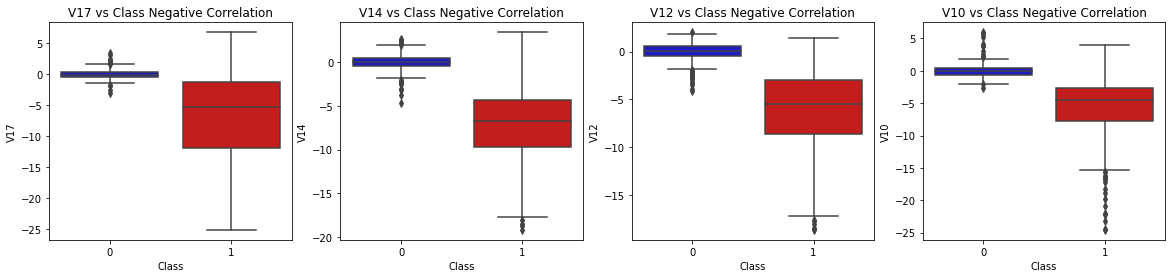

In [143]:
colors = ["#0101DF", "#DF0101"]

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

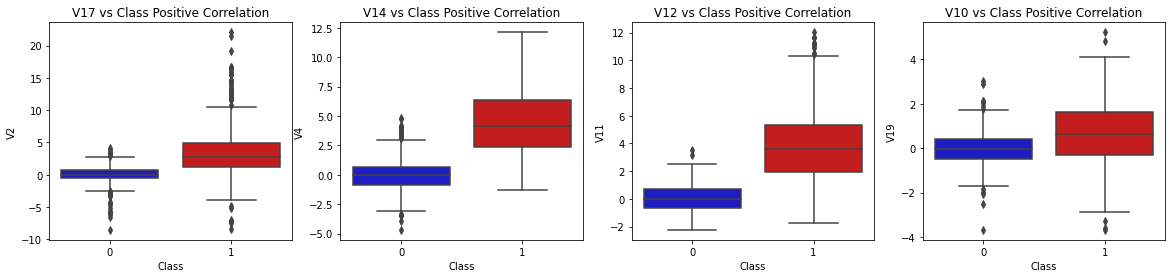

In [144]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Positive Correlation')

plt.show()

## ML MODELS IMPLEMENTATION

Two models will be implemented below: Logistic Regression & KNN --> GridsearchCV for tunning hyperparameters

In [145]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier()
}


In [147]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values



In [148]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score


In [156]:
# Logistic Regression
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

### RESULTS LOGISTIC REGRESSION

In [199]:
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

In [198]:
# Log Reg parameters
grid_log_reg.best_estimator_.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [158]:
# Log Reg - best estimator
log_reg

LogisticRegression(C=0.1)

In [197]:
# Confusion Matrix Log Reg
y_pred_log_reg = log_reg.predict(X_test)
print('CONFUSION MATRIX - Logistic Regression\n\n',
      classification_report(y_test, y_pred_log_reg))

CONFUSION MATRIX - Logistic Regression

               precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.96      0.92      0.94       102

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



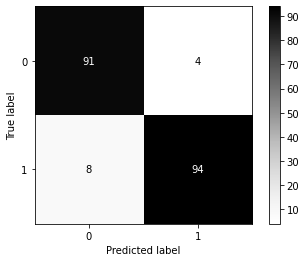

In [209]:
plot_confusion_matrix(log_reg, X_test, y_test, cmap='Greys')
plt.show()

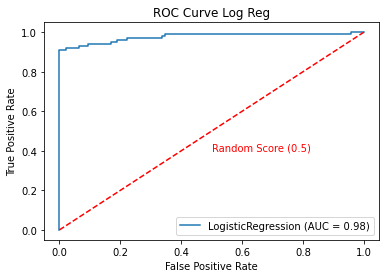

In [210]:
plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve Log Reg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], 'r--')
plt.annotate('Random Score (0.5)', xy=[0.5,0.4], color='red')
plt.show()

### RESULTS KNN

In [157]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [162]:
grid_knears.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [159]:
knears_neighbors

KNeighborsClassifier(n_neighbors=2)

In [170]:
y_pred_knn = grid_knears.predict(X_test)

In [171]:
print('CONFUSION MATRIX - KNN Model \n\n',
      classification_report(y_test, y_pred_knn))

CONFUSION MATRIX - KNN Model 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96        95
           1       1.00      0.92      0.96       102

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



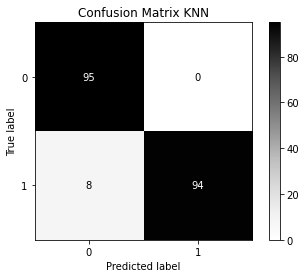

In [212]:
plot_confusion_matrix(knears_neighbors, X_test, y_test, cmap='Greys')
plt.title('Confusion Matrix KNN')
plt.show()

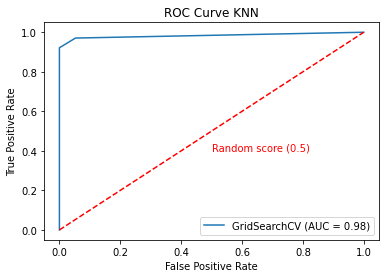

In [196]:
plot_roc_curve(grid_knears, X_test, y_test)
plt.title('ROC Curve KNN')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.annotate('Random score (0.5)', xy=(0.5, 0.4), color='red')
plt.show()
